<a href="https://colab.research.google.com/github/OlimpiaGarcia/Book_algorithm/blob/main/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

In [1]:
# imports generales
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno  as msno
import ast
import xgboost as xgb

# imports de modelo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# imports de metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay


# conexión con google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Leer csv de drive

In [2]:
ruta_dir = "/content/drive/MyDrive/Colab Notebooks/octavo/benji/reto /data/train"

# Creacion de DF

## leer CSV y pasarlo a DF

In [3]:
data = pd.read_csv(os.path.join(ruta_dir, 'train_scaled.csv'), encoding='utf-8')

In [4]:
text = pd.read_csv(os.path.join(ruta_dir, 'train_text.csv'), encoding='utf-8')

In [5]:
data.sample(10)

,id,num_pages,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1,...,محمد عبد الرحمن العريفي,محمد قطب,مصطفى صادق الرافعي,مصطفى محمود,نور عبدالمجيد,هبة سيد عبد العاطي,يحيى بن شرف النووي,يوسف زيدان,ปรีดี พนมยงค์,နုနုရည်အင်းဝ
5504,5504,-1.408323,-0.257808,-0.323511,-0.954992,-0.222280,-0.280272,-0.289466,-0.238037,-0.148126,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
788,788,0.585474,-0.247309,-0.295377,-0.682026,-0.216304,-0.268060,-0.268731,-0.224388,-0.151232,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1241,1241,1.376664,0.577530,0.831632,-0.621367,0.305473,0.619104,0.941761,1.274220,0.953611,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
2503,2503,-0.850535,-0.268918,-0.325850,-1.591914,-0.230010,-0.290850,-0.301064,-0.261141,-0.185079,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
867,867,0.110761,-0.219957,-0.254219,0.409840,-0.187507,-0.237320,-0.243511,-0.223722,-0.165799,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
7027,7027,0.897994,-0.175488,-0.230890,0.713136,-0.145899,-0.170926,-0.230404,-0.216065,-0.137736,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
843,843,-0.229451,-0.131133,-0.171966,0.379510,-0.116498,-0.127932,-0.141718,-0.165131,-0.126704,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
7416,7416,0.189880,0.426987,2.121881,1.592694,0.648419,0.343615,0.026641,-0.083835,-0.112887,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
11890,11890,0.490532,-0.267559,-0.324712,0.409840,-0.228745,-0.289371,-0.299575,-0.260541,-0.184651,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
8862,8862,-0.090993,0.000482,0.027438,0.561488,0.020249,0.005009,-0.052825,-0.051077,-0.020986,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778


In [6]:
text.sample(10)

,id,cover_image_uri,book_title,book_details
2070,2070,https://images-na.ssl-images-amazon.com/images...,The Velvet Promise,All of England rejoiced on her wedding day. Bu...
7718,7718,https://images-na.ssl-images-amazon.com/images...,"Time's arrow, or, The nature of the offence",The story of a life lived backwards in time. I...
75,75,https://images-na.ssl-images-amazon.com/images...,The Rising,Nothing stays dead for long. The dead are retu...
7347,7347,https://images-na.ssl-images-amazon.com/images...,The Book of Mormon: Another Testament of Jesus...,From the Introduction:The Book of Mormon is a ...
158,158,https://images-na.ssl-images-amazon.com/images...,Blood for Blood,Ziba Mackenzie profiles killers. Now one is pr...
9682,9682,https://dryofg8nmyqjw.cloudfront.net/images/no...,Tales of Superstition and Chivalry,This is a reproduction of a book published bef...
2346,2346,https://images-na.ssl-images-amazon.com/images...,Escape from Camp 14: One Man's Remarkable Odys...,"A New York Times bestseller, the shocking stor..."
3102,3102,https://images-na.ssl-images-amazon.com/images...,Elixir,Clea Raymond has felt the glare of the spotlig...
875,875,https://images-na.ssl-images-amazon.com/images...,GOOD BURGER 2 GO: NICKELODEON,"While Ed, the only person who knows how to cre..."
7397,7397,https://images-na.ssl-images-amazon.com/images...,The Child Thief,"Peter is quick, daring, and full of mischief—a..."


# Hacer que ambos DF usen la columna ID como indice

In [7]:
data.set_index('id', inplace=True)
text.set_index('id', inplace=True)

# Implementar KNN

Recomienda libros similares a partir de un ID usando KNN.

Parámetros:
  - id_libro: int, ID del libro de referencia.
  - df_numerico: DataFrame con características numéricas escaladas (indexado por 'id').
  - df_text: DataFrame con información textual (indexado por 'id').
  - n_recomendaciones: número de recomendaciones a devolver (sin contar el libro mismo).

Retorna:
  - DataFrame con títulos y descripciones de los libros recomendados.


In [8]:
def recomendar_librosKNN(id_libro, df_numerico, df_text, n_recomendaciones=10):

  # Entrenar KNN
  knn = NearestNeighbors(metric='cosine', algorithm='auto')
  knn.fit(df_numerico)

  # Vector del libro base
  vector_libro = df_numerico.loc[[id_libro]]

  # Obtener vecinos (sumamos 1 porque el primer resultado será el libro mismo)
  distancias, indices = knn.kneighbors(vector_libro, n_neighbors=n_recomendaciones + 1)

  # Ignorar el primer resultado (es el propio libro)
  indices_recomendados = indices[0][1:]
  ids_recomendados = df_numerico.iloc[indices_recomendados].index

  # Combinar con texto y devolver
  recomendaciones = df_text.loc[ids_recomendados][['book_title', 'book_details']]
  return recomendaciones

## Correr KNN

In [9]:
# Solicitar cuantos libros parecidos quieres:
#recomendaciones = int(input("¿Cuántos libros parecidos quieres?"))

# el libro es harry Potter 5
recomendar_librosKNN(10611, data, text)# Mandar n numero de lbors)

,book_title,book_details
id,,
12399,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...
12693,Harry Potter and the Deathly Hallows,"Harry has been burdened with a dark, dangerous..."
7595,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...
9483,The Tales of Beedle the Bard,"""The Tales of Beedle the Bard"" contains five r..."
10061,Harry Potter and the Cursed Child. Parts One a...,Based on an original new story by J.K. Rowling...
7671,Harry Potter and the Cursed Child: Parts One a...,"The eighth story, nineteen years later...It wa..."
8666,The Harry Potter Collection 1-4,"The exciting tales of Harry Potter, the young ..."
11682,"Harry Potter Boxed Set, Books 1-5",Box Set containing Harry Potter and the Sorcer...
7145,Harry Potter Schoolbooks: Quidditch Through th...,SHS0545007984 Features: -Subjects: Literacy Ce...


# Target:
Saber  que tan buenos son los libros recomendados

### para esto necesitamos la columna "average_rating" sin escalar

In [10]:
rating = pd.read_csv(os.path.join(ruta_dir, 'train_data.csv'), encoding='utf-8')

In [11]:
rating['average_rating']

,average_rating
0,4.24
1,4.26
2,4.00
3,4.03
4,3.84
...,...
12975,3.32
12976,3.58
12977,4.21
12978,4.46


In [12]:
data['average_rating_original'] = rating['average_rating'].values
data.drop('average_rating', axis=1, inplace=True)

In [13]:
data.sample(5).T

id,5434,373,8498,12833,2555
num_pages,0.427237,0.189880,-0.106816,0.680417,-1.143275
num_ratings,-0.210456,-0.215461,0.163445,-0.265208,-0.250824
num_reviews,-0.205664,-0.245115,-0.149016,-0.321804,-0.304671
rating_5,-0.190978,-0.197169,0.085124,-0.228122,-0.216139
rating_4,-0.230754,-0.214851,0.245333,-0.286424,-0.268153
...,...,...,...,...,...
يحيى بن شرف النووي,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778
يوسف زيدان,0.000000,0.000000,0.000000,0.000000,0.000000
ปรีดี พนมยงค์,0.000000,0.000000,0.000000,0.000000,0.000000
နုနုရည်အင်းဝ,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778


## Creamos la clase objetivo a predecir: Rating_class

Asignamos los valores de los ratings a una descripción y creamos la clase:

| Rango rating | Clase | Descripción |
| ------------ | ----- | ----------- |
| <= 2.5       | 0     | Malo        |
| >2.5 y <=2.9 | 1     | Regular     |
| >3 y <=4.0   | 2     | Bueno       |
| >4.0         | 3     | Excelente   |


Creamos la columna rating class y la llenamos con las clases de las distintas categorias usnado cut para seleccionar los intrvalos, bins son los rangos y labels son las clases que van a quedar en la columna

In [14]:
data['rating_class'] = pd.cut(
  data['average_rating_original'],
  bins=[-float('inf'), 2.5, 3.5, 4.0, float('inf')],
  labels=[0, 1, 2, 3]
)

In [15]:
data['rating_class']

,rating_class
id,
0,3
1,3
2,2
3,3
4,2
...,...
12975,1
12976,2
12977,3


In [16]:
# convertir la columna de category a int por que los modelos solo trabajan con numeros
data['rating_class'] = data['rating_class'].astype(int)

Checar como queedaron las clases:

In [17]:
print("Distribución de clases en rating_class:")
print(data['rating_class'].value_counts().sort_index())

Distribución de clases en rating_class:
rating_class
0      33
1     669
2    5348
3    6930
Name: count, dtype: int64


# Separar data en train y test:

uno sera nuestros datos de entrenamiento y el test el de evaluación

In [18]:
# checmos cuantos datos tenemos
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12980 entries, 0 to 12979
Columns: 8353 entries, num_pages to rating_class
dtypes: float64(8352), int64(1)
memory usage: 827.8 MB


Creamos una x donde dropeamos el average rating y el rating class ya que ese lo vamos a usar como la columna a predecir

In [19]:
# Separar X (features) e y (target)
X = data.drop(columns=['average_rating_original', 'rating_class'])
y = data['rating_class']  # Target: clases 0–5

# Dividir en entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Creamos una x alternativa donde dropeamos tambien las columnas de rating para ver como afectan al modelo

In [20]:
X1 = data.drop(columns= ['average_rating_original', 'rating_class','rating_5', 'rating_4', 'rating_3', 'rating_2', 'rating_1'])
y1 = data['rating_class']  # Target: clases 0–5

# Dividir en entrenamiento y prueba (80% / 20%)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y
)

# Funcion que evalua el modelo

Recibe:

- y_test: Valores reales del conjunto de prueba.
- y_pred: Predicciones generadas por el modelo.

Retorna:

- lista de  [accuracy, f1_score, MAE, matriz de confusión]

In [21]:
def evaluar_modelo(y_test, y_pred):
  results = []
  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  mae = mean_absolute_error(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)

  print(f"Accuracy: {acc}")
  print(f"F1 Score: {f1}")
  print(f"MAE: {mae}")
  print("Confusion Matrix:")
  print(cm)

  results.append(acc)
  results.append(f1)
  results.append(mae)
  results.append(cm)

  return results

# Decision tree

## Armar el modelo

Recibe:

- X_train: Conjunto de características para entrenamiento.

- X_test: Conjunto de características para prueba

- y_train: Clase target a producir

- y_test: Clase target para comprobar

- max_depth: Profundidad máxima del árbol de decisión

Retorna
- modelo decision tree

In [22]:
def entrenar_decision_tree(X_train, X_test, y_train, y_test, max_depth = 10):
  # Crear el modelo
  model_dtc = DecisionTreeClassifier(
    criterion= "entropy",     # Usa entropy como en el paper para dividir nodos
    random_state= 42,          # Asegura reproducibilidad del árbol
    max_depth= max_depth             # Limita la profundidad del árbol (reduce overfitting)
)

  # Entrenar
  model_dtc.fit(X_train, y_train)

  return model_dtc

## Correr el modelo 1

In [23]:
# entrenar arbol 1
modelo_arbol = entrenar_decision_tree(X_train, X_test, y_train, y_test)

# predecir arbol 1
y_pred = modelo_arbol.predict(X_test)

## correr modelo 2

In [24]:
# entrenar arbol 2
modelo_arbol2= entrenar_decision_tree(X1_train, X1_test, y1_train, y1_test)

# predecir arbol 2
y_pred2 = modelo_arbol2.predict(X1_test)

## Evaluacion

In [25]:
# evaluar arbol 1
decision_tree1 = evaluar_modelo(y_test, y_pred)

Accuracy: 0.9029275808936826
F1 Score: 0.9019789737280723
MAE: 0.09861325115562404
Confusion Matrix:
[[   3    1    2    0]
 [   1  102   29    2]
 [   0    8  922  140]
 [   0    0   69 1317]]


In [26]:
# evaluar arbol 2
decision_tree2 = evaluar_modelo(y1_test, y_pred2)

Accuracy: 0.6036209553158706
F1 Score: 0.587688567920189
MAE: 0.42295839753466874
Confusion Matrix:
[[   2    0    2    2]
 [   0    7   69   58]
 [   0   15  532  523]
 [   0    5  355 1026]]


# Knn Classifier

## Crear el modelo:
 Parámetros:
  - X_train: DataFrame de entrenamiento (features)
  - y_train: Series de clases (target)
  - n_neighbors: número de vecinos (default=10)

Retorna:
  - modelo_knn entrenado

In [27]:
def entrenar_knn(X_train, y_train, n_neighbors=10):
  model_knn = KNeighborsClassifier(n_neighbors=n_neighbors) # Que tantos vecinos
  model_knn.fit(X_train, y_train)
  return model_knn

## correr el modelo 1



In [28]:
# entrenar
modelo_knn = entrenar_knn(X_train, y_train, n_neighbors=5)

# Predecir
y_pred = modelo_knn.predict(X_test)

## correr modelo 2

In [29]:
# entrenar
modelo_knn2 = entrenar_knn(X1_train, y1_train, n_neighbors=5)

# predecir
y_pred2 = modelo_knn2.predict(X1_test)

## Evaluación

In [30]:
# Evaluar modelo 1
knn1 = evaluar_modelo(y_test, y_pred)

Accuracy: 0.5546995377503852
F1 Score: 0.535668378717213
MAE: 0.450693374422188
Confusion Matrix:
[[  1   0   5   0]
 [  0   6 120   8]
 [  0   6 845 219]
 [  0   1 797 588]]


In [31]:
# evaluar modelo 2
knn2 = evaluar_modelo(y1_test, y_pred2)

Accuracy: 0.5901386748844376
F1 Score: 0.579536641051604
MAE: 0.41910631741140214
Confusion Matrix:
[[  1   0   5   0]
 [  0   6 110  18]
 [  0   6 757 307]
 [  0   1 617 768]]


# Random Forest



## Crear el modelo:
Recibe:

- X_train: Df de entrenamiento.

- y_train: Clases a predecir.

- n_estimators: Número de árboles en el bosque aleatorio (default: 100).

- max_depth: Profundidad máxima de cada árbol individual.

In [32]:
def entrenar_random_forest(X_train, y_train, n_estimators=200, max_depth=10):
  modelo_rf = RandomForestClassifier(
    n_estimators=n_estimators,  # Número de árboles en el bosque
    max_depth=max_depth, # Que tan profundo es el arbol
    class_weight='balanced',  # Ajusta los pesos de clase para manejar desequilibrio
    random_state=42,
    n_jobs=-1  # Utiliza todos los núcleos disponibles para el entrenamiento
  )
  modelo_rf.fit(X_train, y_train)
  return modelo_rf

## modelo 1

In [33]:
# entrenar modelo
modelo_rf = entrenar_random_forest(X_train, y_train)

# Predecir
y_pred = modelo_rf.predict(X_test)

## modelo 2

In [34]:
# Entrenar el modelo
modelo_rf2 = entrenar_random_forest(X1_train, y1_train)

# Predecir
y_pred2 = modelo_rf2.predict(X1_test)

## evaluación:

In [35]:
# Evaluar modelo 1
random_forest1 = evaluar_modelo(y_test, y_pred)

Accuracy: 0.5608628659476117
F1 Score: 0.5837713377005999
MAE: 0.5558551617873652
Confusion Matrix:
[[  4   2   0   0]
 [ 11  65  38  20]
 [ 36 140 553 341]
 [ 77  93 382 834]]


In [36]:
# Evaluar modelo 2
random_forest2 = evaluar_modelo(y1_test, y_pred2)

Accuracy: 0.5489214175654854
F1 Score: 0.5700677921142943
MAE: 0.5685670261941448
Confusion Matrix:
[[  4   1   1   0]
 [ 16  56  37  25]
 [ 38 135 516 381]
 [ 86  69 382 849]]


# XGBoost

## Crear el modelo:
Recibe:

- X_train: Df de entrenamiento.

- y_train: Clases a predecir.

- n_estimators: Número de árboles (default: 100).

- max_depth: Profundidad máxima de cada árbol individual.

In [37]:
def entrenar_xgboost(X_train, y_train, n_estimators=100, max_depth=6):
  modelo_xgb = xgb.XGBClassifier(
    n_estimators=n_estimators,               # Número de árboles en el modelo
    max_depth=max_depth,                     # Profundidad máxima de cada árbol
    objective='multi:softmax',               # hae quue el modelo rpediga directamente la clase con mayor probabilidad
    num_class=len(y_train.unique()),         # hace un len de los unios para sacar el num de clases (4)
    eval_metric='mlogloss',                  # Log loss multiclass que usa cross entropy
    random_state=42
    )
  modelo_xgb.fit(X_train, y_train)
  return modelo_xgb

## modelo 1

In [38]:
# Entrenar el modelo
modelo_xgb = entrenar_xgboost(X_train, y_train)

# Predecir
y_pred = modelo_xgb.predict(X_test)

## modelo 2

In [39]:
# Entrenar el modelo
modelo_xgb2 = entrenar_xgboost(X1_train, y1_train)

# Predecir
y_pred2 = modelo_xgb2.predict(X1_test)

## Evaluación

In [40]:
# Evaluar modelo 1
xgb1 = evaluar_modelo(y_test, y_pred)

Accuracy: 0.9591679506933745
F1 Score: 0.9585461948103353
MAE: 0.04314329738058552
Confusion Matrix:
[[   2    2    0    2]
 [   0  109   25    0]
 [   0    7 1022   41]
 [   1    0   28 1357]]


In [41]:
# Evaluar modelo 2
xgb2 = evaluar_modelo(y1_test, y_pred2)

Accuracy: 0.6744992295839753
F1 Score: 0.655178433155781
MAE: 0.3447611710323575
Confusion Matrix:
[[   1    0    2    3]
 [   0    2   95   37]
 [   0    7  633  430]
 [   1    3  267 1115]]


# Comparación entre todos los modelos:D

- Decision Tree 1
- Decision Tree 2

- Knn 1
- Knn 2

- Random Forest 1
- Random Forest 2

- XGB 1
- XGB 2

## DF de todos los resultados

In [42]:
model_names = [
  "Decision Tree 1", "Decision Tree 2",
  "KNN 1", "KNN 2",
  "Random Forest 1", "Random Forest 2",
  "XGB 1", "XGB 2"
]

model_results_train = [
  decision_tree1, decision_tree2,
  knn1, knn2,
  random_forest1, random_forest2,
  xgb1, xgb2
]

In [43]:
def comparar_modelos(model_results, model_names):

  acc_list = [res[0] for res in model_results]
  f1_list = [res[1] for res in model_results]
  mae_list = [res[2] for res in model_results]

  df_results = pd.DataFrame({
    "Modelo": model_names,
    "Accuracy": acc_list,
    "F1-Score": f1_list,
    "MAE": mae_list
  })

  return df_results

In [44]:
df_results = comparar_modelos(model_results_train, model_names)
df_results

,Modelo,Accuracy,F1-Score,MAE
0,Decision Tree 1,0.902928,0.901979,0.098613
1,Decision Tree 2,0.603621,0.587689,0.422958
2,KNN 1,0.554700,0.535668,0.450693
3,KNN 2,0.590139,0.579537,0.419106
4,Random Forest 1,0.560863,0.583771,0.555855
5,Random Forest 2,0.548921,0.570068,0.568567
6,XGB 1,0.959168,0.958546,0.043143
7,XGB 2,0.674499,0.655178,0.344761


## Matriz de confusión

In [45]:
# Lista de confussion matrix  de los resultados
cm_list = [
  decision_tree1[3], decision_tree2[3],
  knn1[3], knn2[3],
  random_forest1[3], random_forest2[3],
  xgb1[3], xgb2[3]
]

In [46]:
# Función para graficar todas las matrices
def plot_confusion_matrices(cm_list, model_names, class_labels=None):
  fig, axes = plt.subplots(2, 4, figsize=(22, 10))  # 2 filas x 4 columnas
  axes = axes.flatten()

  for i, (cm, name) in enumerate(zip(cm_list, model_names)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicción")
    axes[i].set_ylabel("Real")

  plt.tight_layout()
  plt.show()

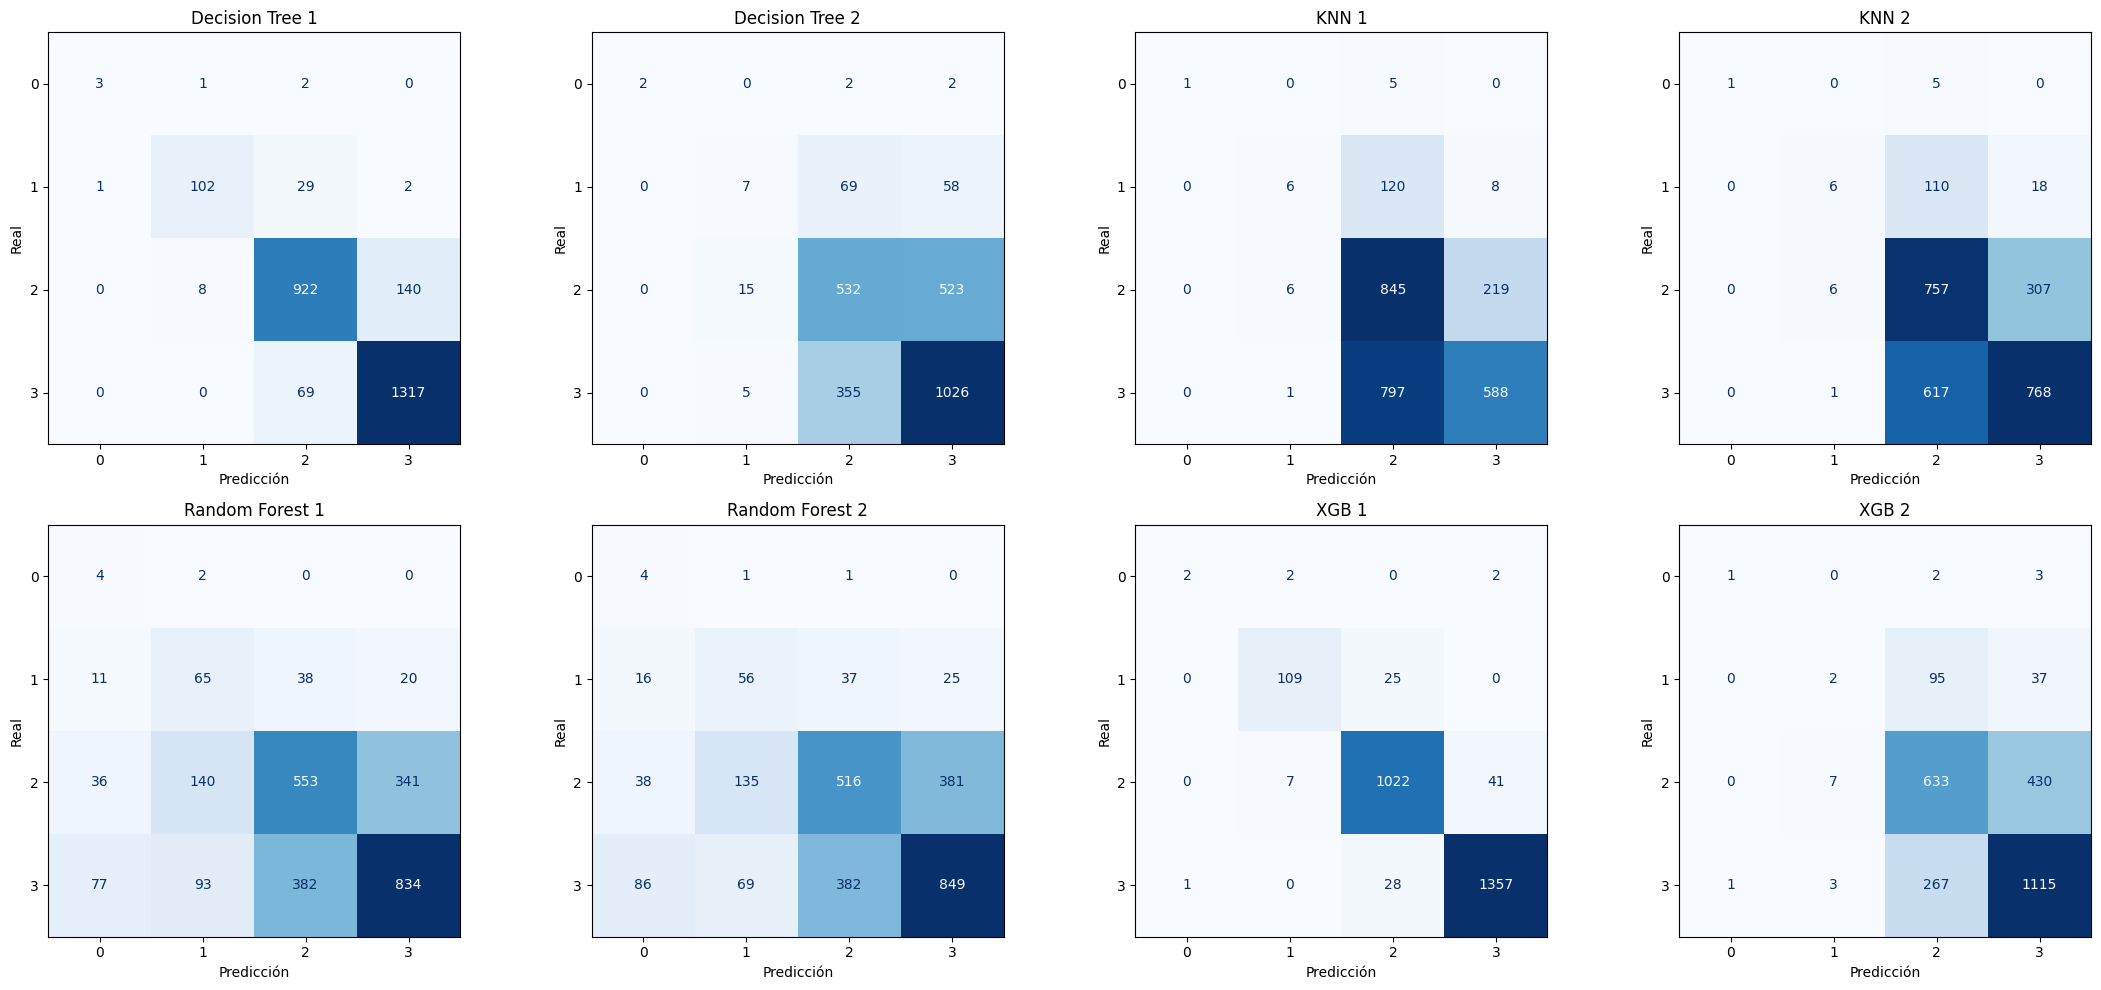

In [47]:
# Llamar la función para mostrar las matrices
plot_confusion_matrices(cm_list, model_names)

# Añadimos el set de Test

In [48]:
ruta_dir_test = "/content/drive/MyDrive/Colab Notebooks/octavo/benji/reto /data/test"

In [49]:
data_test = pd.read_csv(os.path.join(ruta_dir_test, 'test_scaled.csv'), encoding='utf-8')

In [50]:
text_test = pd.read_csv(os.path.join(ruta_dir_test, 'test_text.csv'), encoding='utf-8')

In [51]:
data_test.sample(10)

,id,num_pages,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1,...,محمد عبد الرحمن العريفي,محمد قطب,مصطفى صادق الرافعي,مصطفى محمود,نور عبدالمجيد,هبة سيد عبد العاطي,يحيى بن شرف النووي,يوسف زيدان,ปรีดี พนมยงค์,နုနုရည်အင်းဝ
1403,1403,3.781880,-0.166185,-0.282290,0.561488,-0.118558,-0.215740,-0.204191,-0.154744,-0.055476,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1722,1722,0.241307,2.837770,2.598897,0.318851,2.822105,2.403752,2.603582,3.565743,3.860370,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
2272,2272,-0.229451,-0.265249,-0.324459,0.349181,-0.227029,-0.286404,-0.296516,-0.259476,-0.184115,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
2371,2371,-0.395601,-0.263344,-0.311499,-0.530378,-0.226921,-0.283860,-0.291761,-0.254017,-0.181544,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1922,1922,0.617122,0.077498,-0.029336,0.349181,0.028418,0.180149,0.088122,-0.060798,-0.094678,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1460,1460,-0.324394,-0.264410,-0.313711,-1.136970,-0.228014,-0.285473,-0.292960,-0.251886,-0.179509,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
3194,3194,-0.838667,-0.268946,-0.325850,-1.197629,-0.230004,-0.290881,-0.301146,-0.261340,-0.185079,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
2223,2223,-0.094949,0.250432,0.060883,-1.318947,0.017560,0.218790,0.707415,0.984393,0.619855,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
342,342,0.047466,-0.267804,-0.324396,-0.742685,-0.229292,-0.289774,-0.299182,-0.258611,-0.184651,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
14,14,-0.545927,-0.268717,-0.322626,1.774672,-0.229457,-0.290922,-0.301394,-0.261274,-0.184972,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778


In [52]:
text_test.sample(10)

,id,cover_image_uri,book_title,book_details
2606,2606,https://images-na.ssl-images-amazon.com/images...,A Briefer History of Time,"Stephen Hawking's worldwide bestseller, A Brie..."
2940,2940,https://images-na.ssl-images-amazon.com/images...,Dark Knight of the Skye,Coming to the USA wasn’t all it’s cracked up t...
2103,2103,https://images-na.ssl-images-amazon.com/images...,The Deptford Trilogy,Around a mysterious death is woven a glitterin...
550,550,https://images-na.ssl-images-amazon.com/images...,In Plain Sight: A True Story of Kidnapping and...,Held against her will and raped by her 38-year...
3083,3083,https://images-na.ssl-images-amazon.com/images...,Under the Jolly Roger: Being an Account of the...,After leaving the Lawson Peabody School for Yo...
1054,1054,https://images-na.ssl-images-amazon.com/images...,Staying Strong: 365 Days a Year,Demi Lovato wakes up each morning and affirms ...
515,515,https://images-na.ssl-images-amazon.com/images...,New York,Edward Rutherfurd celebrates America’s greates...
367,367,https://images-na.ssl-images-amazon.com/images...,Tiger and the Robot,"She lives in the cloud, and travels in a phone..."
3217,3217,https://images-na.ssl-images-amazon.com/images...,Like Water for Chocolate,"Earthy, magical, and utterly charming, this ta..."
1033,1033,https://images-na.ssl-images-amazon.com/images...,Discover Your Inner Economist: Use Incentives ...,In Discover Your Inner Economist one of Americ...


## Hacer que ambos DF usen la columna ID como indice

In [53]:
data_test.set_index('id', inplace=True)
text_test.set_index('id', inplace=True)

## Añadimos el data set de test sin esclaar para hacer el target

## Target:
Saber  que tan buenos son los libros recomendados

### para esto necesitamos la columna "average_rating" sin escalar

In [54]:
rating_test = pd.read_csv(os.path.join(ruta_dir_test, 'test_data.csv'), encoding='utf-8')

In [55]:
rating_test['average_rating']

,average_rating
0,3.73
1,3.96
2,3.98
3,3.66
4,3.87
...,...
3240,4.35
3241,4.03
3242,3.88
3243,4.53


In [56]:
data_test['average_rating_original'] = rating_test['average_rating'].values
data_test.drop('average_rating', axis=1, inplace=True)

In [57]:
data_test.sample(5).T

id,2625,1747,1124,1036,1472
num_pages,-1.170966,-0.110772,0.716021,-0.269010,-1.131407
num_ratings,-0.037118,-0.267636,5.423660,-0.248702,-0.084558
num_reviews,-0.065625,-0.322626,3.067630,-0.303533,-0.145096
rating_5,-0.002604,-0.228821,4.268553,-0.217175,-0.066792
rating_4,-0.056100,-0.289826,5.721300,-0.262270,-0.084535
...,...,...,...,...,...
يحيى بن شرف النووي,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778
يوسف زيدان,0.000000,0.000000,0.000000,0.000000,0.000000
ปรีดี พนมยงค์,0.000000,0.000000,0.000000,0.000000,0.000000
နုနုရည်အင်းဝ,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778


## Creamos la clase objetivo a predecir: Rating_class

Asignamos los valores de los ratings a una descripción y creamos la clase:

| Rango rating | Clase | Descripción |
| ------------ | ----- | ----------- |
| <= 2.5       | 0     | Malo        |
| >2.5 y <=2.9 | 1     | Regular     |
| >3 y <=4.0   | 2     | Bueno       |
| >4.0         | 3     | Excelente   |


Creamos la columna rating class y la llenamos con las clases de las distintas categorias usnado cut para seleccionar los intrvalos, bins son los rangos y labels son las clases que van a quedar en la columna

In [58]:
data_test['rating_class'] = pd.cut(
  data_test['average_rating_original'],
  bins=[-float('inf'), 2.5, 3.5, 4.0, float('inf')],
  labels=[0, 1, 2, 3]
)

In [59]:
data_test['rating_class']

,rating_class
id,
0,2
1,2
2,2
3,2
4,2
...,...
3240,3
3241,3
3242,2


In [60]:
# convertir la columna de category a int por que los modelos solo trabajan con numeros
data_test['rating_class'] = data_test['rating_class'].astype(int)

Checar como queedaron las clases:

In [61]:
print("Distribución de clases en rating_class:")
print(data_test['rating_class'].value_counts().sort_index())

Distribución de clases en rating_class:
rating_class
0      19
1     179
2    1347
3    1700
Name: count, dtype: int64


# Separar los datos de test

Creamos una x donde dropeamos el average rating y el rating class ya que ese lo vamos a usar como la columna a predecir

In [62]:
# Separar X (features) e y (target)
X_T = data_test.drop(columns=['average_rating_original', 'rating_class'])
y_T = data_test['rating_class']  # Target: clases 0–5


Creamos una x alternativa donde dropeamos tambien las columnas de rating para ver como afectan al modelo

In [63]:
X1_T = data.drop(columns= ['average_rating_original', 'rating_class','rating_5', 'rating_4', 'rating_3', 'rating_2', 'rating_1'])
y1_T = data['rating_class']  # Target: clases 0–5


# Comprobar el modelo con los datos de test

### Decision Tree

#### Correr el modelo

In [64]:
# Modelo 1
y_pred1 = modelo_arbol.predict(X_T)

# Modelo 2
y_pred2 = modelo_arbol2.predict(X1_T)

#### Evaluar

In [65]:
# MODELO 1
decision_tree1_test = evaluar_modelo(y_T, y_pred1)

Accuracy: 0.8912172573189522
F1 Score: 0.8901464318682246
MAE: 0.11217257318952234
Confusion Matrix:
[[   8    4    7    0]
 [   1  138   37    3]
 [   1   26 1152  168]
 [   0    0  106 1594]]


In [66]:
# MODELO 2
decision_tree2_test = evaluar_modelo(y1_T, y_pred2)

Accuracy: 0.6521571648690293
F1 Score: 0.6409713144738609
MAE: 0.37010785824345144
Confusion Matrix:
[[  19    0    5    9]
 [   0  121  296  252]
 [   0   25 2962 2361]
 [   1   12 1554 5363]]


### KNN CLASSIFIER

#### CORRER EL MODELO

In [67]:
# modelo 1
y_pred1 = modelo_knn.predict(X_T)

# modelo 2
y_pred2 = modelo_knn2.predict(X1_T)

#### EVALUAR EL MODELO

In [68]:
# modelo 1
knn1_test = evaluar_modelo(y_T, y_pred1)

Accuracy: 0.551617873651772
F1 Score: 0.5314917908718629
MAE: 0.4560862865947612
Confusion Matrix:
[[   3    0   16    0]
 [   0    8  163    8]
 [   0   15 1064  268]
 [   0    1  984  715]]


In [69]:
# modelo 2
knn2_test = evaluar_modelo(y1_T, y_pred2)

Accuracy: 0.7563944530046225
F1 Score: 0.7456729766842871
MAE: 0.25169491525423726
Confusion Matrix:
[[   6    0   26    1]
 [   0   84  519   66]
 [   0   24 4214 1110]
 [   0   11 1405 5514]]


### Random Forest

#### Correr el modelo

In [70]:
# modelo 1
y_pred1 = modelo_rf.predict(X_T)

# modelo 2
y_pred2 = modelo_rf2.predict(X1_T)

#### EVALAR MODELO

In [71]:
# modelo 1
random_forest1_test = evaluar_modelo(y_T, y_pred1)

Accuracy: 0.5577812018489985
F1 Score: 0.5821795286702662
MAE: 0.5722650231124807
Confusion Matrix:
[[  14    5    0    0]
 [  23   76   56   24]
 [  49  180  716  402]
 [ 114  121  461 1004]]


In [72]:
#modelo 2
random_forest2_test = evaluar_modelo(y1_T, y_pred2)

Accuracy: 0.610246533127889
F1 Score: 0.6318810146814621
MAE: 0.5060092449922958
Confusion Matrix:
[[  31    1    1    0]
 [  74  400  106   89]
 [ 195  580 3005 1568]
 [ 447  330 1668 4485]]


### XGBOOST

#### CORRER EL MODELO

In [73]:
# modelo 1
y_pred1 = modelo_xgb.predict(X_T)

# modelo 2
y_pred2 = modelo_xgb2.predict(X1_T)


#### EVALUAR MODELO

In [74]:
# modelo 1
xgb1_test = evaluar_modelo(y_T, y_pred1)

Accuracy: 0.9510015408320494
F1 Score: 0.9501550428463129
MAE: 0.052080123266563944
Confusion Matrix:
[[   8    8    0    3]
 [   3  141   34    1]
 [   1    9 1278   59]
 [   1    0   40 1659]]


In [75]:
# modelo 2
xgb2_test = evaluar_modelo(y1_T, y_pred2)

Accuracy: 0.7660246533127889
F1 Score: 0.7581348451563538
MAE: 0.2477657935285054
Confusion Matrix:
[[  28    0    2    3]
 [   1  190  316  162]
 [   0    9 3761 1578]
 [   3    3  960 5964]]


# Comparacion entre todos los modelos

## DF de todos los resultados

In [76]:
model_names = [
  "Decision Tree 1", "Decision Tree 2",
  "KNN 1", "KNN 2",
  "Random Forest 1", "Random Forest 2",
  "XGB 1", "XGB 2"
]

model_results_test = [
 decision_tree1_test, decision_tree2_test,
 knn1_test, knn2_test,
 random_forest1_test, random_forest2_test,
 xgb1_test, xgb2_test
]

In [77]:
df_test = comparar_modelos(model_results_test, model_names)
df_test

,Modelo,Accuracy,F1-Score,MAE
0,Decision Tree 1,0.891217,0.890146,0.112173
1,Decision Tree 2,0.652157,0.640971,0.370108
2,KNN 1,0.551618,0.531492,0.456086
3,KNN 2,0.756394,0.745673,0.251695
4,Random Forest 1,0.557781,0.582180,0.572265
5,Random Forest 2,0.610247,0.631881,0.506009
6,XGB 1,0.951002,0.950155,0.052080
7,XGB 2,0.766025,0.758135,0.247766


## Matriz de confusión

In [78]:
# Lista de confussion matrix  de los resultados
cm_list_test = [
  decision_tree1_test[3], decision_tree2_test[3],
  knn1_test[3], knn2_test[3],
  random_forest1_test[3], random_forest2_test[3],
  xgb1_test[3], xgb2_test[3]
]


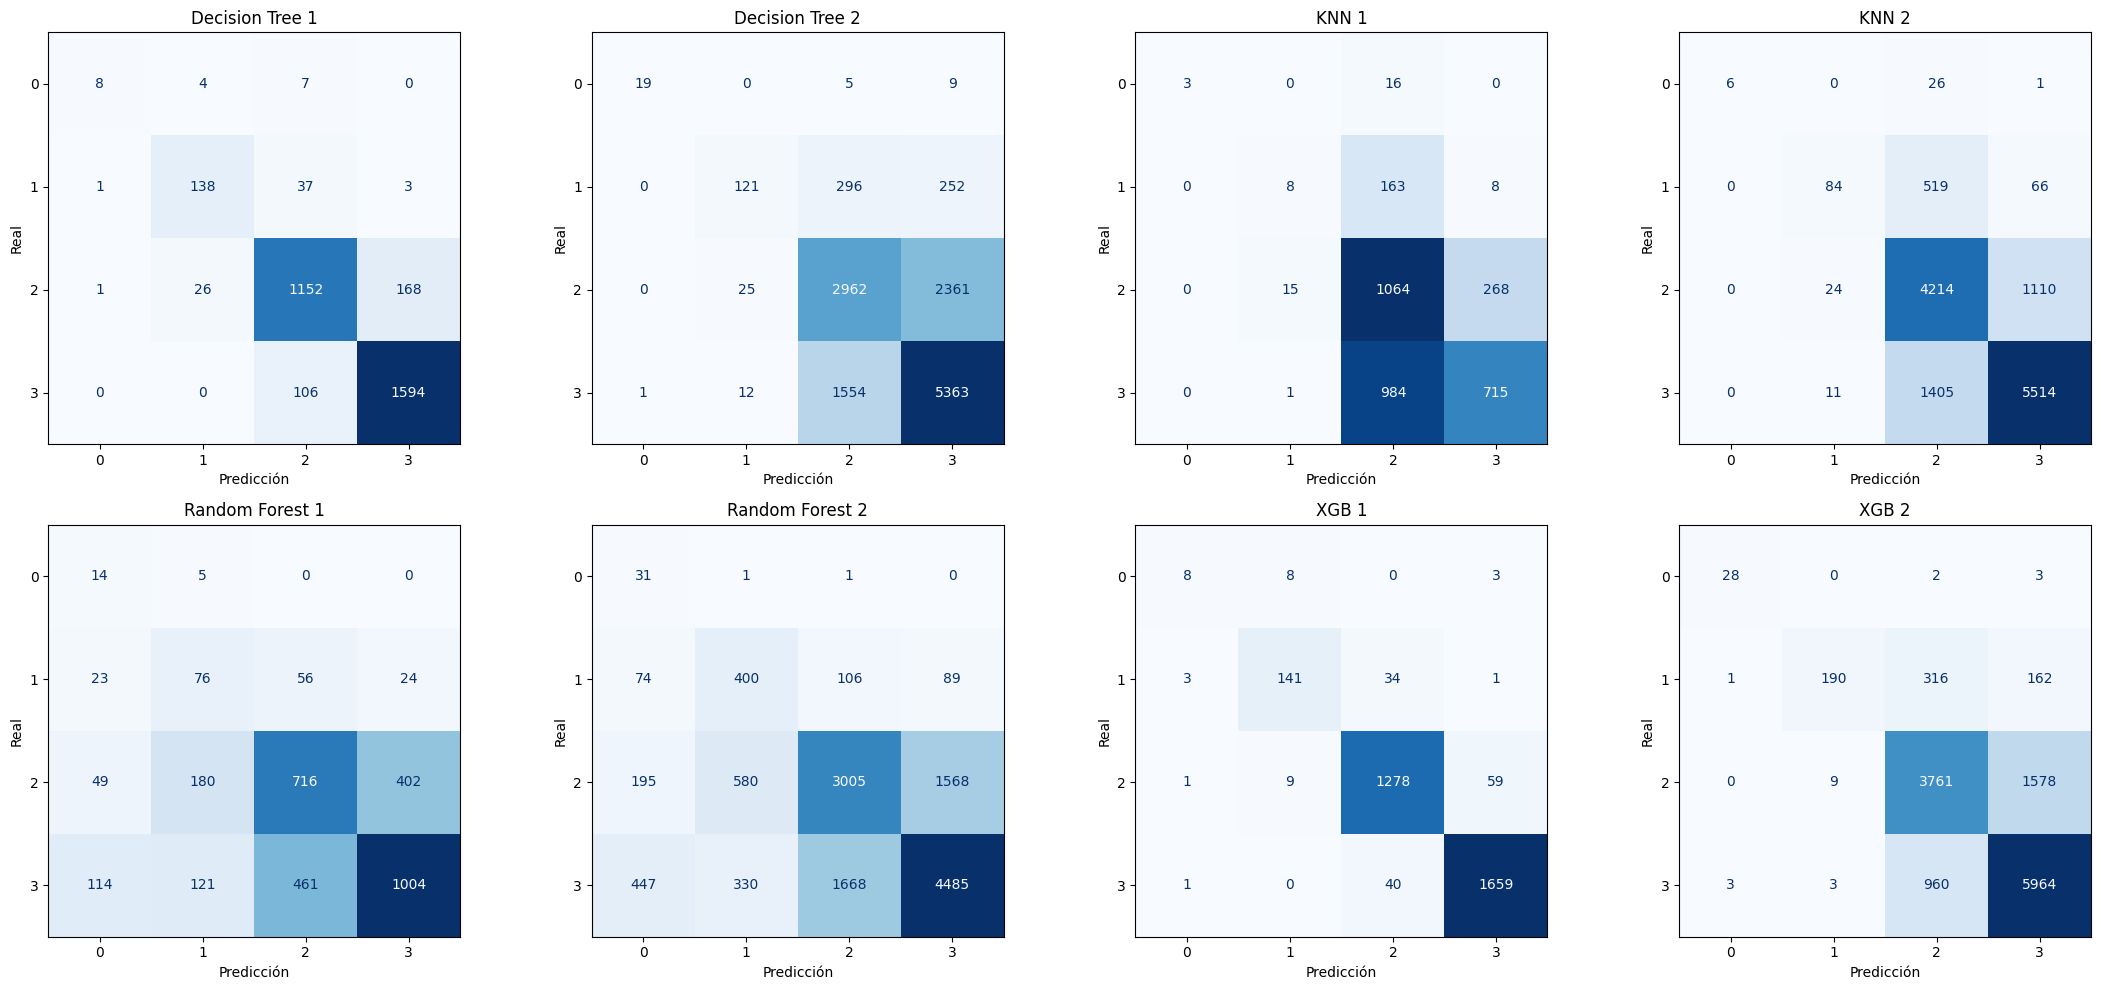

In [79]:
# Llamar la función para mostrar las matrices
plot_confusion_matrices(cm_list_test, model_names)

# Comparamos train vs test

# comparamos los results de train vs test

In [80]:
df_comparacion = df_results.merge(
  df_test,
  on="Modelo",
  suffixes=("_validacion", "_test")
)

In [81]:
df_comparacion

,Modelo,Accuracy_validacion,F1-Score_validacion,MAE_validacion,Accuracy_test,F1-Score_test,MAE_test
0,Decision Tree 1,0.902928,0.901979,0.098613,0.891217,0.890146,0.112173
1,Decision Tree 2,0.603621,0.587689,0.422958,0.652157,0.640971,0.370108
2,KNN 1,0.554700,0.535668,0.450693,0.551618,0.531492,0.456086
3,KNN 2,0.590139,0.579537,0.419106,0.756394,0.745673,0.251695
4,Random Forest 1,0.560863,0.583771,0.555855,0.557781,0.582180,0.572265
5,Random Forest 2,0.548921,0.570068,0.568567,0.610247,0.631881,0.506009
6,XGB 1,0.959168,0.958546,0.043143,0.951002,0.950155,0.052080
7,XGB 2,0.674499,0.655178,0.344761,0.766025,0.758135,0.247766


## Grafica de comparacion
* codigo generado por chat :D

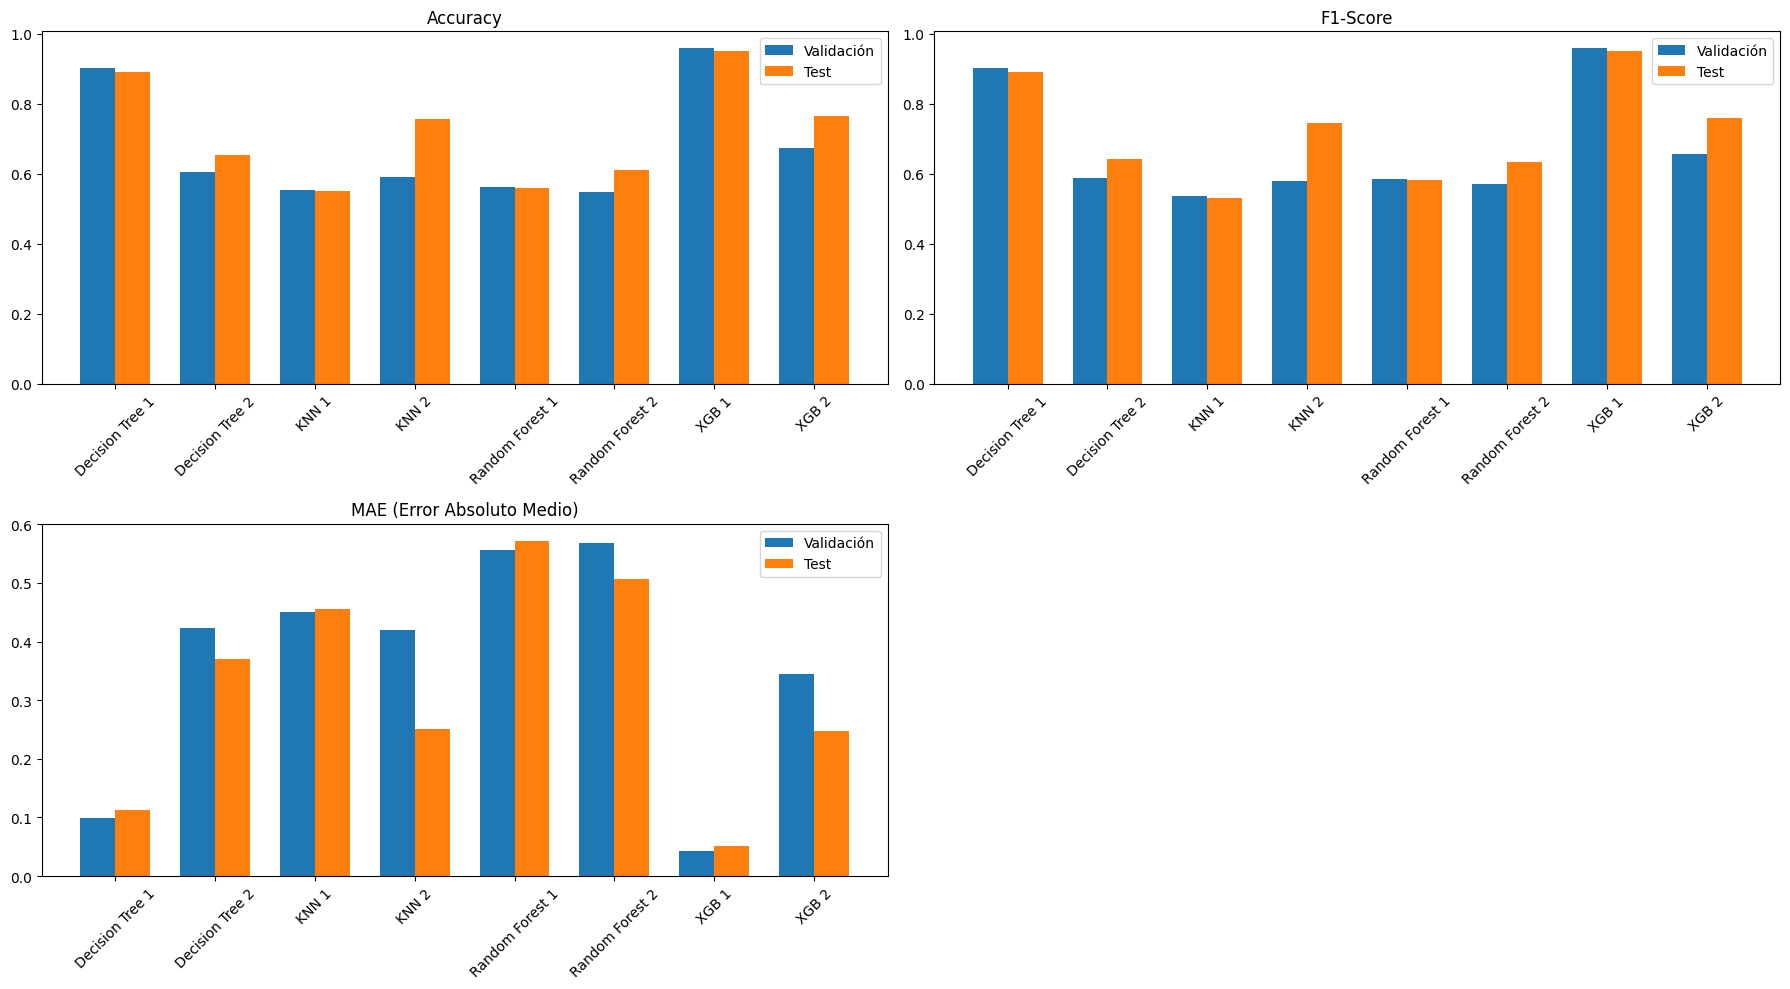

In [82]:
x = np.arange(len(df_comparacion["Modelo"]))
width = 0.35

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

# Accuracy
axes[0].bar(x - width/2, df_comparacion["Accuracy_validacion"], width, label="Validación")
axes[0].bar(x + width/2, df_comparacion["Accuracy_test"], width, label="Test")
axes[0].set_title("Accuracy")
axes[0].set_xticks(x)
axes[0].set_xticklabels(df_comparacion["Modelo"], rotation=45)
axes[0].legend()

# F1 Score
axes[1].bar(x - width/2, df_comparacion["F1-Score_validacion"], width, label="Validación")
axes[1].bar(x + width/2, df_comparacion["F1-Score_test"], width, label="Test")
axes[1].set_title("F1-Score")
axes[1].set_xticks(x)
axes[1].set_xticklabels(df_comparacion["Modelo"], rotation=45)
axes[1].legend()

# MAE
axes[2].bar(x - width/2, df_comparacion["MAE_validacion"], width, label="Validación")
axes[2].bar(x + width/2, df_comparacion["MAE_test"], width, label="Test")
axes[2].set_title("MAE (Error Absoluto Medio)")
axes[2].set_xticks(x)
axes[2].set_xticklabels(df_comparacion["Modelo"], rotation=45)
axes[2].legend()

# Ocultar el 4to subplot vacío
axes[3].axis('off')

plt.tight_layout()
plt.show()

# Conclusion:
El mejor modelo es XGB2, por que no usa ninguna de las columnas de ratong para predecir la calidad del libro.